<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

# <font color='black'>Table of contents<font><a class='anchor' id='top'></a>
- [Build and Run a oxDNA Simulation](#1)
- [Run Multiple Simulations in Parallel](#2)
- [Umbrella Sampling](#3)

<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Umbrella Sampling</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [1]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager, Simulation
import os

In [2]:
simulation_manager = SimulationManager()
simulation_manager.restart_nvidia_cuda_mps_control()

In [4]:
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/double_layer'
sim_dir = f'{file_dir}/unbiased_equlibration'

sim = Simulation(file_dir, sim_dir)
sim.build(clean_build='force')
sim.input_file({'steps':'1e7'})
sim.oxpy_run.run()


Running: unbiased_equlibration
Run time: 811.1201085700304
Finished: /scratch/matthew/ipy_oxDNA/ipy_oxdna_examples/double_layer/unbiased_equlibration


In [17]:
sim.oxpy_run.process.terminate()

In [ ]:
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/double_layer'
system = 'umbrella_final'

com_list = '3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604'
ref_list = '6913,6914,6915,6916,6917,6918,6919,6920,6921,6922,6923,6924,6925,6926,6927,6928,6929,6930,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940,6941,6942,6943,6944,6945,6946,6947,6948,6949,6950,6951,6952,6953,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963,6964,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976,6977,6978,6979,6980,6981,6982,6983,6984,6985,6986,6987,6988,6989,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042,7043,7044'

xmin = 0
xmax = 72.787
n_windows = 100

stiff = 0.2


equlibration_parameters = {'steps':'1e7', 'T':'20C', 'print_energy_every': '1e7', 'print_conf_interval':'1e7', 'max_density_multiplier':'1.5'}
production_parameters = {'steps':'2e7', 'T':'20C', 'print_energy_every': '2e7', 'print_conf_interval':'2e7', 'max_density_multiplier':'1.5'}

us = ComUmbrellaSampling(file_dir, system)
simulation_manager = SimulationManager()

In [4]:
us.analysis.view_conf('prod', 40)

In [4]:
us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters, observable=False, print_every=1e4, continue_run=False)

In [5]:
simulation_manager.run()

Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Run time: 4430.742740893038
Finished: 12


INFO: Lists updated 60695 times (every ~164.758217 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.201 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00387 MB/s



Running: 39
Run time: 4365.722321284935
Finished: 26


INFO: Lists updated 60672 times (every ~164.820675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00386 MB/s



Running: 40
Run time: 4431.316673656111
Finished: 20


INFO: Lists updated 60777 times (every ~164.535926 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00385 MB/s



Running: 41
Run time: 4541.021743158926
Finished: 4


INFO: Lists updated 60852 times (every ~164.333136 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.198 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00384 MB/s



Running: 42
Run time: 4566.050543879042
Finished: 6


INFO: Lists updated 60722 times (every ~164.684958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.210 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00384 MB/s



Running: 43
Run time: 4527.625288491021
Finished: 18


INFO: Lists updated 60694 times (every ~164.760932 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00384 MB/s



Running: 44
Run time: 5001.405910230009
Finished: 14


INFO: Lists updated 60626 times (every ~164.945733 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.202 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00331 MB/s



Running: 45
Run time: 5123.484534745105
Finished: 10


INFO: Lists updated 60754 times (every ~164.598216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.197 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00325 MB/s



Running: 46
Run time: 4985.17848502798
Finished: 38


INFO: Lists updated 60666 times (every ~164.836976 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.205 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00323 MB/s



Running: 47
Run time: 5040.997870745021
Finished: 31


INFO: Lists updated 60786 times (every ~164.511565 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.205 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00322 MB/s



Running: 48
Run time: 5046.61031857098
Finished: 30


INFO: Lists updated 60736 times (every ~164.646997 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0032 MB/s



Running: 49
Run time: 5208.349943803973
Finished: 0


INFO: Lists updated 60871 times (every ~164.281842 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00327 MB/s



Running: 50
Run time: 5176.600328499917
Finished: 16


INFO: Lists updated 60693 times (every ~164.763647 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.210 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00321 MB/s



Running: 51
Run time: 5156.316704286961
Finished: 27


INFO: Lists updated 60716 times (every ~164.701232 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.205 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00385 MB/s



Running: 52
Run time: 5297.0336667390075
Finished: 2


INFO: Lists updated 60666 times (every ~164.836976 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Running: 53
Run time: 5187.951690569986
Finished: 33


INFO: Lists updated 60575 times (every ~165.084606 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00386 MB/s



Running: 54
Run time: 5242.263292712043
Finished: 25


INFO: Lists updated 60806 times (every ~164.457455 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.212 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00382 MB/s



Running: 55
Run time: 5210.9063060450135
Finished: 34


INFO: Lists updated 60874 times (every ~164.273746 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00387 MB/s



Running: 56
Run time: 5328.007720132009
Finished: 19


INFO: Lists updated 60781 times (every ~164.525098 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00383 MB/s



Running: 57
Run time: 5280.355758133926
Finished: 32


INFO: Lists updated 60742 times (every ~164.630733 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00382 MB/s



Running: 58
Run time: 5290.74500301294
Finished: 36


INFO: Lists updated 60664 times (every ~164.842411 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00298 MB/s



Running: 59
Run time: 5439.686253063963
Finished: 15


INFO: Lists updated 60678 times (every ~164.804377 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.193 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00299 MB/s



Running: 60
Run time: 5381.184019232984
Finished: 29


INFO: Lists updated 60736 times (every ~164.646997 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.211 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00298 MB/s



Running: 61
Run time: 5488.192402097047
Finished: 11


INFO: Lists updated 60764 times (every ~164.571128 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00378 MB/s



Running: 62
Run time: 5481.700725210016
Finished: 13


INFO: Lists updated 60729 times (every ~164.665975 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00379 MB/s



Running: 63
Run time: 5604.2945494259475
Finished: 1


INFO: Lists updated 60855 times (every ~164.325035 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00296 MB/s



Running: 64
Run time: 5593.926240648027
Finished: 8


INFO: Lists updated 60750 times (every ~164.609053 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00297 MB/s



Running: 65
Run time: 5620.289695885964
Finished: 5


INFO: Lists updated 60718 times (every ~164.695807 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.202 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00383 MB/s



Running: 66
Run time: 5695.827241827967
Finished: 22


INFO: Lists updated 60752 times (every ~164.603634 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00295 MB/s



Running: 67
Run time: 5902.973963800003
Finished: 7


INFO: Lists updated 60910 times (every ~164.176654 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.217 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00333 MB/s



Running: 68
Run time: 5842.116903436021
Finished: 35


INFO: Lists updated 60777 times (every ~164.535926 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00333 MB/s



Running: 69
Run time: 5939.044214305002
Finished: 28


INFO: Lists updated 60735 times (every ~164.649708 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00332 MB/s



Running: 70
Run time: 5995.821540527977
Finished: 21


INFO: Lists updated 60798 times (every ~164.479095 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00332 MB/s



Running: 71
Run time: 6067.685217575985
Finished: 23


INFO: Lists updated 60673 times (every ~164.817959 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.211 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Running: 72
Run time: 6009.58207124006
Finished: 37


INFO: Lists updated 60721 times (every ~164.687670 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.198 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00322 MB/s



Running: 73
Run time: 6159.542803613003
Finished: 9


INFO: Lists updated 60745 times (every ~164.622603 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.199 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00322 MB/s



Running: 74
Run time: 6099.311805119971
Finished: 24


INFO: Lists updated 60734 times (every ~164.652419 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.199 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Running: 75
Run time: 6215.1348997289315
Finished: 17


INFO: Lists updated 60927 times (every ~164.130845 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0032 MB/s



Running: 76
Run time: 6461.592356932
Finished: 3


INFO: Lists updated 60832 times (every ~164.387165 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Running: 77
Run time: 4251.081956826034
Finished: 39


INFO: Lists updated 60754 times (every ~164.598216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.205 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00385 MB/s



Running: 78
Run time: 4789.380459864973
Finished: 44


INFO: Lists updated 60734 times (every ~164.652419 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.211 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0033 MB/s



Running: 79
Run time: 4932.357655305066
Finished: 41


INFO: Lists updated 60782 times (every ~164.522391 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.207 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00384 MB/s



Running: 80
Run time: 4899.765782431001
Finished: 43


INFO: Lists updated 60706 times (every ~164.728363 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.208 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00383 MB/s



Running: 81
Run time: 5011.418402438052
Finished: 40


INFO: Lists updated 60758 times (every ~164.587379 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.197 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00375 MB/s



Running: 82
Run time: 4359.532899109996
Finished: 48


INFO: Lists updated 60779 times (every ~164.530512 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.208 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0037 MB/s



Running: 83
Run time: 4783.3657201210735
Finished: 46


INFO: Lists updated 60793 times (every ~164.492623 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.218 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00327 MB/s



Running: 84
Run time: 4786.376476043952
Finished: 49


INFO: Lists updated 60719 times (every ~164.693094 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.200 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00327 MB/s



Running: 85
Run time: 4717.424173763022
Finished: 52


INFO: Lists updated 60746 times (every ~164.619893 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.208 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00386 MB/s



Running: 86
Run time: 5581.236548545072
Finished: 42


INFO: Lists updated 60795 times (every ~164.487211 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.199 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00328 MB/s



Running: 87
Run time: 4804.743363256101
Finished: 56


INFO: Lists updated 60744 times (every ~164.625313 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.207 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00386 MB/s



Running: 88
Run time: 4882.259434039006
Finished: 54


INFO: Lists updated 60605 times (every ~165.002888 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.213 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00375 MB/s



Running: 89
Run time: 4814.5237841579365
Finished: 57


INFO: Lists updated 60816 times (every ~164.430413 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00376 MB/s



Running: 90
Run time: 4813.98884071596
Finished: 61


INFO: Lists updated 60760 times (every ~164.581962 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.212 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0032 MB/s



Running: 91
Run time: 4793.704046587925
Finished: 63


INFO: Lists updated 60780 times (every ~164.527805 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.202 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00385 MB/s



Running: 92
Run time: 5165.307054655044
Finished: 50


INFO: Lists updated 60747 times (every ~164.617183 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.202 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00354 MB/s



Running: 93
Run time: 5267.163189788
Finished: 47


INFO: Lists updated 60689 times (every ~164.774506 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00353 MB/s



Running: 94
Run time: 4842.927995483042
Finished: 65


INFO: Lists updated 60721 times (every ~164.687670 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.212 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Running: 95
Run time: 4933.0953806999605
Finished: 66


INFO: Lists updated 60760 times (every ~164.581962 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00371 MB/s



Running: 96
Run time: 5571.507458847947
Finished: 45


INFO: Lists updated 60797 times (every ~164.481800 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00323 MB/s



Running: 97
Run time: 5580.666402003961
Finished: 51


INFO: Lists updated 60600 times (every ~165.016502 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.212 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00323 MB/s



Running: 98
Run time: 5543.079077635077
Finished: 53


INFO: Lists updated 60771 times (every ~164.552171 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.199 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00321 MB/s



Running: 99
Run time: 5485.73399208195
Finished: 58


INFO: Lists updated 60777 times (every ~164.535926 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.219 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00326 MB/s



Run time: 5594.402370977099
Finished: 55


INFO: Lists updated 60655 times (every ~164.866870 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00323 MB/s



Run time: 5373.71334700007
Finished: 64


INFO: Lists updated 60825 times (every ~164.406083 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00326 MB/s



Run time: 5540.301747442922
Finished: 59


INFO: Lists updated 60690 times (every ~164.771791 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00324 MB/s



Run time: 5547.076451931964
Finished: 60


INFO: Lists updated 60643 times (every ~164.899494 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.202 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Run time: 5548.577355820104
Finished: 62


INFO: Lists updated 60701 times (every ~164.741932 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.206 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Run time: 5500.8694856860675
Finished: 67


INFO: Lists updated 60765 times (every ~164.568419 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.220 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00319 MB/s



Run time: 5027.211494317045
Finished: 76


INFO: Lists updated 60820 times (every ~164.419599 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00357 MB/s



Run time: 5507.465330517967
Finished: 68


INFO: Lists updated 60703 times (every ~164.736504 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.202 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00325 MB/s



Run time: 5010.1748603089945
Finished: 77


INFO: Lists updated 60816 times (every ~164.430413 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.195 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00356 MB/s



Run time: 5281.332291526021
Finished: 75


INFO: Lists updated 60615 times (every ~164.975666 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00336 MB/s



Run time: 5302.091414607945
Finished: 74


INFO: Lists updated 60567 times (every ~165.106411 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.197 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00336 MB/s



Run time: 5465.204106972087
Finished: 70


INFO: Lists updated 60657 times (every ~164.861434 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.196 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00321 MB/s



Run time: 5501.282912007999
Finished: 71


INFO: Lists updated 60793 times (every ~164.492623 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00323 MB/s



Run time: 5455.731548551004
Finished: 72


INFO: Lists updated 60713 times (every ~164.709370 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00322 MB/s



Run time: 4185.128786694026
Finished: 78


INFO: Lists updated 60717 times (every ~164.698519 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.208 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00367 MB/s



Run time: 3528.2533508649794
Finished: 83


INFO: Lists updated 60768 times (every ~164.560295 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.205 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00444 MB/s



Run time: 2943.1362508919556
Finished: 87


INFO: Lists updated 60764 times (every ~164.571128 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.204 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00606 MB/s



Run time: 3287.8865959150717
Finished: 85


INFO: Lists updated 60585 times (every ~165.057357 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.194 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0049 MB/s



Run time: 3154.755576304975
Finished: 91


INFO: Lists updated 60645 times (every ~164.894056 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.202 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00498 MB/s



Run time: 2859.2827428950695
Finished: 97


INFO: Lists updated 60648 times (every ~164.885899 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.201 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00585 MB/s



Run time: 3135.3018801920116
Finished: 93


INFO: Lists updated 60698 times (every ~164.750074 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.200 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00555 MB/s



Run time: 4171.355787760927
Finished: 79


INFO: Lists updated 60875 times (every ~164.271047 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.207 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00373 MB/s



Run time: 2850.7901237170445
Finished: 99


INFO: Lists updated 60732 times (every ~164.657841 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.198 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00592 MB/s



Run time: 3047.895772422082
Finished: 98


INFO: Lists updated 60793 times (every ~164.492623 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.205 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00561 MB/s



Run time: 3971.930051036994
Finished: 84


INFO: Lists updated 60811 times (every ~164.443933 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.200 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00388 MB/s



Run time: 4483.088985822047
Finished: 80


INFO: Lists updated 60709 times (every ~164.720223 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.196 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00363 MB/s



Run time: 4446.8461953670485
Finished: 82


INFO: Lists updated 60755 times (every ~164.595507 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00368 MB/s



Run time: 4542.0682759179035
Finished: 81


INFO: Lists updated 60820 times (every ~164.419599 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00361 MB/s



Run time: 3724.6707049889956
Finished: 95


INFO: Lists updated 60763 times (every ~164.573836 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.212 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00414 MB/s



Run time: 3798.7058962819865
Finished: 94


INFO: Lists updated 60753 times (every ~164.600925 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.200 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00416 MB/s



Run time: 4080.064207913936
Finished: 90


INFO: Lists updated 60761 times (every ~164.579253 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00381 MB/s



Run time: 4345.47048448096
Finished: 86


INFO: Lists updated 60678 times (every ~164.804377 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.199 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0037 MB/s



Run time: 4136.409616197925
Finished: 89


INFO: Lists updated 60687 times (every ~164.779936 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.209 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00386 MB/s



Run time: 4279.01938322105
Finished: 88


INFO: Lists updated 60752 times (every ~164.603634 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.201 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00375 MB/s



Run time: 3937.6034458199283
Finished: 96


INFO: Lists updated 60635 times (every ~164.921250 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.203 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00398 MB/s



Run time: 4199.915233735926
Finished: 92


INFO: Lists updated 60833 times (every ~164.384462 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 13.198 MB written to files
	124.000  B written to stdout/stderr
	For a total of  0.00382 MB/s



All queued simulations finished


In [6]:
us.build_production_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, production_parameters, observable=True, print_every=1e4, name='com_distance.txt')

In [6]:
simulation_manager.run()

Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Running: 83
Running: 84
Running: 85
Running: 86
Running: 87
Running: 88
Running: 89
Running: 90
Running: 91
Running: 92
Running: 93
Running: 94
Running: 95
Running: 96
Running: 97
Running: 98
Running: 99


KeyboardInterrupt: 

Run time: 11105.926476513036
Finished: 78
Run time: 11111.067038526991
Finished: 77


INFO: Lists updated 178406 times (every ~164.609918 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.445 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000681 MB/s

INFO: Lists updated 168368 times (every ~164.825816 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.449 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000643 MB/s



Run time: 11081.258679762948
Finished: 83
Run time: 11096.500560292974
Finished: 80
Run time: 11086.479875063058
Finished: 82


INFO: Lists updated 177398 times (every ~164.521156 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.441 MB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00069 MB/s

INFO: Lists updated 163420 times (every ~164.789677 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.443 MB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00066 MB/s

INFO: Lists updated 160157 times (every ~164.881822 steps)


Run time: 11006.25737665908
Finished: 98


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.437 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000664 MB/s

INFO: Lists updated 146233 times (every ~164.611647 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.436 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000714 MB/s



Run time: 11036.754615587066
Finished: 92
Run time: 11117.149714978994
Finished: 76
Run time: 11122.22728699504
Finished: 75


INFO: Lists updated 145007 times (every ~164.847483 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.439 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000723 MB/s

INFO: Lists updated 168629 times (every ~164.407178 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.443 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000763 MB/s

INFO: Lists updated 159834 times (every ~164.858547 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.445 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000662 MB/s



Run time: 11077.366916977917
Finished: 84


INFO: Lists updated 179488 times (every ~164.857823 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.442 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000707 MB/s



Run time: 11047.513866072055
Finished: 90


INFO: Lists updated 142918 times (every ~164.710743 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.435 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000737 MB/s



Run time: 11103.145503883949
Finished: 79
Run time: 11093.185060987016
Finished: 81


INFO: Lists updated 152884 times (every ~164.830859 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.442 MB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00069 MB/s

INFO: Lists updated 166697 times (every ~164.490069 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.446 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000748 MB/s



Run time: 11063.47249549895
Finished: 87
Run time: 11073.53362681705
Finished: 85
Run time: 11023.332668641931
Finished: 95


INFO: Lists updated 141972 times (every ~164.469057 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.435 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000736 MB/s

INFO: Lists updated 151622 times (every ~164.685870 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.438 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000697 MB/s

INFO: Lists updated 160721 times (every ~164.882007 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.451 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000747 MB/s



Run time: 11013.60558607208
Finished: 97
Run time: 11003.636159190908
Finished: 99


INFO: Lists updated 138065 times (every ~164.632608 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.435 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000751 MB/s

INFO: Lists updated 143476 times (every ~164.905636 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.439 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000728 MB/s



Run time: 11043.999636807013
Finished: 91
Run time: 11054.129962946055
Finished: 89


INFO: Lists updated 144605 times (every ~164.657681 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.435 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000832 MB/s

INFO: Lists updated 135489 times (every ~164.955650 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.436 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000756 MB/s



Run time: 11019.069278175011
Finished: 96
Run time: 11034.205691786017
Finished: 93


INFO: Lists updated 132297 times (every ~164.823035 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.432 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000787 MB/s

INFO: Lists updated 139339 times (every ~164.702524 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.432 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000746 MB/s



Run time: 11060.479169680038
Finished: 88


INFO: Lists updated 154101 times (every ~164.826971 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.438 MB written to files
	 62.000  B written to stdout/stderr
	For a total of  0.00084 MB/s



Run time: 11071.404785797
Finished: 86
Run time: 11031.209836976952
Finished: 94


INFO: Lists updated 143314 times (every ~164.673382 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.438 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000728 MB/s

INFO: Lists updated 153582 times (every ~164.732853 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.438 MB written to files
	 62.000  B written to stdout/stderr
	For a total of 0.000831 MB/s



In [12]:
wham_dir = os.path.abspath('../wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '30'
us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

Running WHAM analysis...
WHAM analysis completed
0      True
1      True
2      True
3      True
4      True
       ... 
195    True
196    True
197    True
198    True
199    True
Name: +/-, Length: 200, dtype: bool


(-0.5, 25.0)

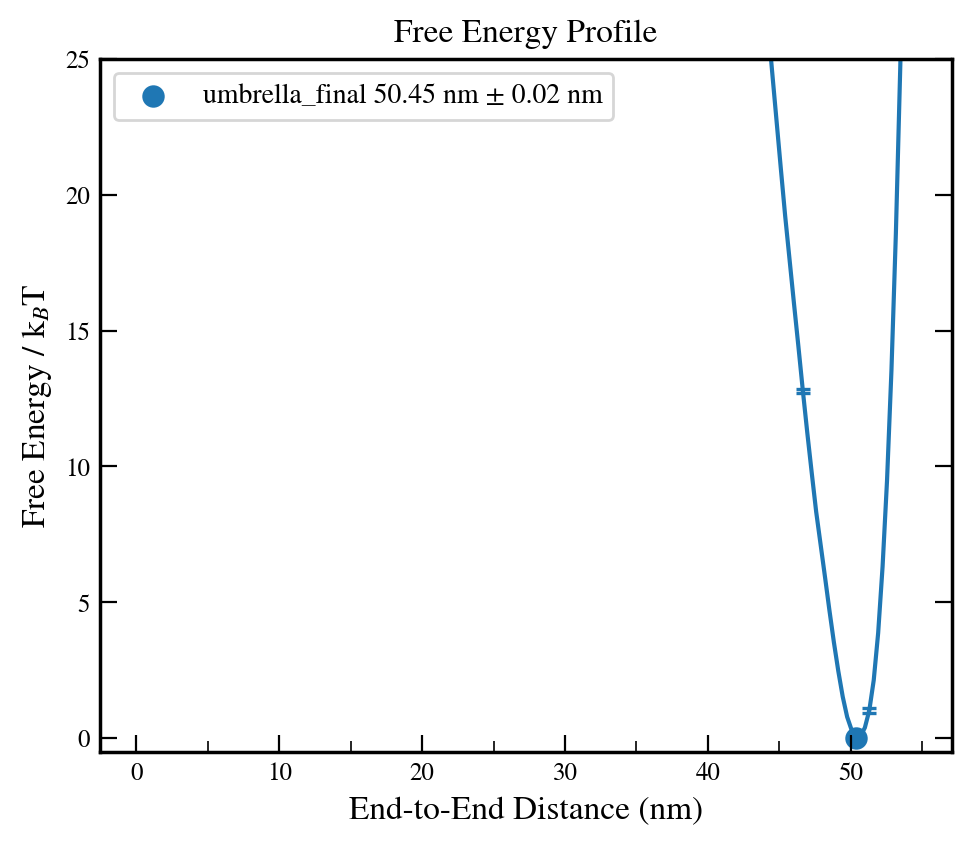

In [13]:
import matplotlib.pyplot as plt
us.plot_free()
plt.ylim(-0.5, 25)

<font size='6'><a class="anchor" id="4"></a> <h2 align="center"> <font color='black'>Multiple Umbrella Sampling Systems</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [2]:
simulation_manager = SimulationManager()
simulation_manager.restart_nvidia_cuda_mps_control()
del simulation_manager

In [1]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager
import os

In [3]:
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
systems = [f'den_bench_{n_cpus}' for n_cpus in [1, 2, 5, 10, 15, 20, 30, 40]]

com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'

stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = [n_cpus for n_cpus in [1, 2, 5, 10, 15, 20, 30, 40]]

equlibration_parameters = {'steps':'2e5', 'print_energy_every': '2e5', 'print_conf_interval':'2e5', 'max_density_multiplier':'2'}
production_parameters = {'steps':'2e5', 'print_energy_every': '2e5', 'print_conf_interval':'2e5'}

us_list = [ComUmbrellaSampling(file_dir, system) for system in systems]

simulation_managers = [SimulationManager(n_processes=n_cpus) for n_cpus in [1, 2, 5, 10, 15, 20, 30, 40]]

In [4]:
for us, simulation_manager, windows in zip(us_list, simulation_managers, n_windows):
    us.build_equlibration_runs(simulation_manager, windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters, observable=False, print_every=1e4, name='com_distance.txt')

In [ ]:
for simulation_manager in simulation_managers:
    simulation_manager.worker_manager(gpu_mem_block=False)

Running: 0


In [ ]:
for us, simulation_manager, windows in zip(us_list, simulation_managers, n_windows):
    us.build_production_runs(simulation_manager, windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters, observable=True, print_every=1e4, name='com_distance.txt')

In [ ]:
for simulation_manager in simulation_managers:
    simulation_manager.worker_manager(gpu_mem_block=False)